In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [10]:
df = pd.read_csv('dengue_features_train.csv')
df1 = pd.read_csv('dengue_labels_train.csv')
df2 = pd.read_csv('dengue_features_test.csv')
df3 = pd.read_csv('submission_format.csv')

In [11]:
pd.set_option('display.max_columns', 24)
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

In [12]:
df['year'].min()

1990

In [13]:
df['year'].max()

2010

In [14]:
df.shape

(1456, 24)

In [15]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [16]:
df.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714   
25%       0.144209              9.800000             297.658929   
50%       0.189450             38.340000             298.646429   
75%       0.246982             70.235000             299.833571   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
count            1446.000000                  1446.000000   
mean              299.225578                   295.246356   
std                 1.261715                     1.527810   
min               294.892857                   289.642857   
25%               298.257143                   294.118929   
50%               299.289286                   295.640714   
75%               300.207143                   296.460000   
max               302.928571                   298.450000   

       reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
count                1446.000000                1446.000000   
mean                  303.427109                 295.719156   
std                     3.234601                   2.565364   
min                   297.800000                 286.900000   
25%                   301.000000                 293.900000   
50%                   302.400000                 296.200000   
75%                   305.500000                 297.900000   
max                   314.000000                 299.900000   

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                      1446.000000                           1446.000000   
mean                         40.151819                             82.161959   
std                          43.434399                              7.153897   
min                           0.000000                             57.787143   
25%                          13.055000                             77.177143   
50%                          27.245000                             80.301429   
75%                          52.200000                             86.357857   
max                         570.500000                             98.610000   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                   1443.000000                            1446.000000   
mean                      45.760388                              16.746427   
std                       43.715537                               1.542494   
min                        0.000000                              11.715714   
25%                        9.800000                              15.557143   
50%                       38.340000                              17.087143   
75%                       70.235000                              17.978214   
max                      390.600000                              20.461429   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count        1446.000000         1413.000000              1413.000000   
mean            4.903754           27.185783           

In [17]:
df1.describe()

year   weekofyear  total_cases
count  1456.000000  1456.000000  1456.000000
mean   2001.031593    26.503434    24.675137
std       5.408314    15.019437    43.596000
min    1990.000000     1.000000     0.000000
25%    1997.000000    13.750000     5.000000
50%    2002.000000    26.500000    12.000000
75%    2005.000000    39.250000    28.000000
max    2010.000000    53.000000   461.000000

In [18]:
df_copy = df.copy()
df1_copy = df1.copy()

In [19]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [20]:
merged_df = pd.merge(df_copy, df1_copy)

In [21]:
merged_df

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0     0.177617                 12.42             297.572857   
1     0.155486                 22.82             298.211429   
2     0.170843                 34.54             298.781429   
3     0.235886                 15.36             298.987143   
4     0.247340                  7.52             299.518571   
...        ...                   ...                    ...   
1451  0.292514                 55.30             299.334286   
1452  0.225657                 86.47             298.330000   
1453  0.233714                 58.94             296.598571   
1454  0.325486                 59.67             296.345714   
1455  0.315757                 63.22             298.097143   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
0                297.742857                   292.414286  ...   
1                298.442857                   293.951429  ...   
2                298.878571                   295.434286  ...   
3                299.228571                   295.310000  ...   
4                299.664286                   295.821429  ...   
...                     ...                          ...  ...   
1451             300.771429                   296.825714  ...   
1452             299.392857                   296.452857  ...   
1453             297.592857                   295.501429  ...   
1454             297.521429                   295.324286  ...   
1455             299.835714                   295.807143  ...   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                         295.9                            32.00   
1                         296.4                            17.94   
2                         297.3                            26.10   
3                         297.0                            13.90   
4                         297.5                            12.20   
...                         ...                              ...   
1451                      294.5                            45.00   
1452                      291.9                           207.10   
1453                      292.4                            50.60   
1454                      291.9                            62.33   
1455                      292.3                            36.90   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                73.365714                         12.42   
1                                77.368571                         22.82   
2                                82.052857                         34.54   
3                                80.337143                         15.36   
4                                80.460000                          7.52   
...                                    ...                           ...   
1451                             88.765714                         55.30   
1452                             91.600000                         86.47   
1453                             94.28000

In [22]:
df1.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [23]:
df1['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [24]:
df1.shape

(1456, 4)

In [25]:
df1['year'].min()

1990

In [26]:
df1['year'].max()

2010

In [27]:
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
0             297.742857                   292.414286  ...   
1             298.442857                   293.951429  ...   
2             298.878571                   295.434286  ...   
3             299.228571                   295.310000  ...   
4             299.664286                   295.821429  ...   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [28]:
merged_df.groupby('week_start_date')['total_cases'].sum().sort_values(ascending=False)[:50]

week_start_date
1994-10-15    461
1994-10-08    426
1994-11-12    410
1994-10-01    395
1994-10-22    381
1994-11-19    364
1994-11-26    359
1994-11-05    353
1994-10-29    333
1998-08-06    329
1994-09-24    302
1994-12-03    288
1994-09-17    272
1998-08-13    263
1998-07-30    256
1994-12-10    221
1998-08-20    220
1998-08-27    204
1994-09-10    202
1998-07-23    191
1998-09-03    181
1994-09-03    179
2007-10-01    176
1991-11-26    169
1995-01-01    154
1998-07-16    150
1994-12-17    149
2007-10-08    146
1991-10-15    142
1991-12-03    141
1991-11-05    140
1991-10-01    140
1991-10-29    140
2005-09-03    137
2005-09-10    131
2005-08-20    130
1991-10-22    129
1991-11-19    129
1998-07-02    128
2004-12-09    128
1998-07-09    127
1991-11-12    127
1998-10-08    127
2005-08-27    119
2007-09-10    119
1991-10-08    116
1994-08-27    115
1994-12-24    112
2005-09-17    112
2007-10-15    112
Name: total_cases, dtype: int64

In [29]:
merged_df['week_start_date']

0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: object

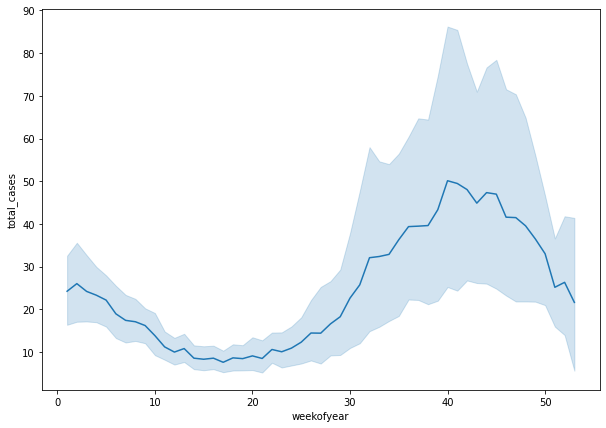

In [30]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=merged_df, x='weekofyear', y='total_cases')
plt.show()

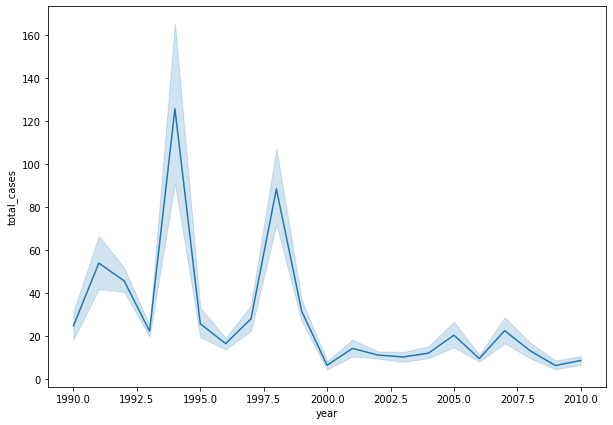

In [31]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=merged_df, x='year', y='total_cases')
plt.show()

In [32]:
station_ = merged_df[['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [33]:
station_.describe()

station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1413.000000              1413.000000         1436.000000   
mean            27.185783                 8.059328           32.452437   
std              1.292347                 2.128568            1.959318   
min             21.400000                 4.528571           26.700000   
25%             26.300000                 6.514286           31.100000   
50%             27.414286                 7.300000           32.800000   
75%             28.157143                 9.566667           33.900000   
max             30.800000                15.800000           42.200000   

       station_min_temp_c  station_precip_mm  total_cases  
count         1442.000000        1434.000000  1456.000000  
mean            22.102150          39.326360    24.675137  
std              1.574066          47.455314    43.596000  
min             14.700000           0.000000     0.000000  
25%             21.100000           8.700000     5.000000  
50%             22.200000          23.850000    12.000000  
75%             23.300000          53.900000    28.000000  
max             25.600000         543.300000   461.000000

In [34]:
station_.corr()

station_avg_temp_c  station_diur_temp_rng_c  \
station_avg_temp_c                 1.000000                 0.303850   
station_diur_temp_rng_c            0.303850                 1.000000   
station_max_temp_c                 0.764576                 0.715217   
station_min_temp_c                 0.633252                -0.439345   
station_precip_mm                  0.063144                 0.179648   
total_cases                        0.116109                -0.237844   

                         station_max_temp_c  station_min_temp_c  \
station_avg_temp_c                 0.764576            0.633252   
station_diur_temp_rng_c            0.715217           -0.439345   
station_max_temp_c                 1.000000            0.140521   
station_min_temp_c                 0.140521            1.000000   
station_precip_mm                  0.167098           -0.050110   
total_cases                       -0.039219            0.267109   

                         station_precip_mm  total_cases  
station_avg_temp_c                0.063144     0.116109  
station_diur_temp_rng_c           0.179648    -0.237844  
station_max_temp_c                0.167098    -0.039219  
station_min_temp_c               -0.050110     0.267109  
station_precip_mm                 1.000000    -0.074374  
total_cases                      -0.074374     1.000000

In [35]:
px.bar(merged_df, x='year', y='station_avg_temp_c')

In [36]:
px.bar(merged_df, x='weekofyear', y='station_avg_temp_c')

In [37]:
px.histogram(merged_df, x='year', y='station_precip_mm', nbins=50)

In [38]:
px.histogram(merged_df, x='weekofyear', y='station_precip_mm', nbins=50)

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

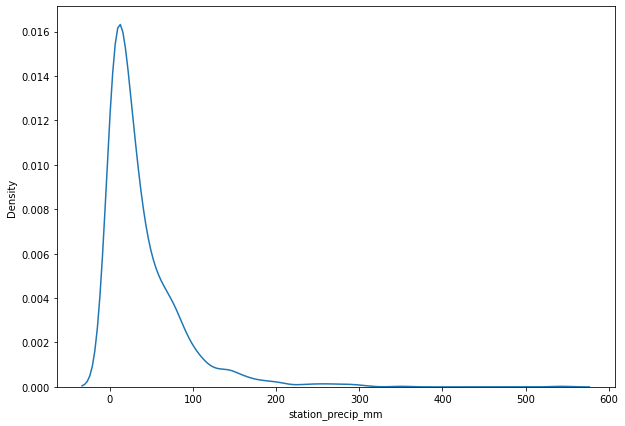

In [40]:
plt.figure(figsize=(10, 7))
sns.kdeplot(data=merged_df, x='station_precip_mm')
plt.show()

In [41]:
px.histogram(merged_df, x='station_precip_mm', nbins=100)

In [42]:
px.histogram(merged_df, x='city', y='total_cases')

In [43]:
px.histogram(merged_df, x='year', y='station_precip_mm', color='city')

In [44]:
px.histogram(merged_df, x='year', y='station_avg_temp_c', color='city')

In [45]:
px.histogram(merged_df, x='year', y='station_diur_temp_rng_c', color='city')

In [46]:
px.histogram(merged_df, x='year', y='station_min_temp_c', color='city')

In [47]:
px.histogram(merged_df, x='year', y='station_max_temp_c', color='city')

In [48]:
px.histogram(merged_df, x='year', y='precipitation_amt_mm', color='city')

In [49]:
merged_df[['reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']]

reanalysis_sat_precip_amt_mm  reanalysis_dew_point_temp_k  \
0                            12.42                   292.414286   
1                            22.82                   293.951429   
2                            34.54                   295.434286   
3                            15.36                   295.310000   
4                             7.52                   295.821429   
...                            ...                          ...   
1451                         55.30                   296.825714   
1452                         86.47                   296.452857   
1453                         58.94                   295.501429   
1454                         59.67                   295.324286   
1455                         63.22                   295.807143   

      reanalysis_air_temp_k  reanalysis_relative_humidity_percent  \
0                297.572857                             73.365714   
1                298.211429                             77.368571   
2                298.781429                             82.052857   
3                298.987143                             80.337143   
4                299.518571                             80.460000   
...                     ...                                   ...   
1451             299.334286                             88.765714   
1452             298.330000                             91.600000   
1453             296.598571                             94.280000   
1454             296.345714                             94.660000   
1455             298.097143                             89.082857   

      reanalysis_specific_humidity_g_per_kg  reanalysis_precip_amt_kg_per_m2  \
0                                 14.012857                            32.00   
1                                 15.372857                            17.94   
2                                 16.848571                            26.10   
3                                 16.672857                            13.90   
4                                 17.210000                            12.20   
...                                     ...                              ...   
1451                              18.485714                            45.00   
1452                              18.070000                           207.10   
1453                              17.008571                            50.60   
1454                              16.815714                            62.33   
1455                              17.355714                            36.90   

      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                         299.8                      295.9   
1                         300.9                      296.4   
2                         300.5                      297.3   
3                         301.4                      297.0   
4                         301.9                      297.5   
...                         ...                        ...   
1451                      309.7                      294.5   
1452                      308.5                      291.9   
1453                      305.5                      292.4   
1454                      306.1                      291.9   
1455                      307.8                      292.3   

      reanalysis_avg_temp_k  reanalysis_tdtr_k  
0                297.742857           2.628571  
1                298.442857           2.371429  
2                298.878571           2.300000  
3                299.228571           2.428571  
4                299.664286           3.014286  
...                     ...                ...  
1451             300.771429           9.800000  
1452             299.392857           7.471429  
1453             297.592857           7.500000  
1454             297.521429           7.871429  
1455             299.835714          11.014286  

[1456 rows x 10 columns]

In [50]:
px.histogram(merged_df, x='year', y='reanalysis_sat_precip_amt_mm', color='city')

In [51]:
px.histogram(merged_df, x='weekofyear', y='reanalysis_sat_precip_amt_mm', color='city')

In [52]:
px.histogram(merged_df, x='week_start_date', y='reanalysis_sat_precip_amt_mm', color='city')

In [53]:
px.histogram(merged_df, x='year', y='reanalysis_dew_point_temp_k', color='city')

In [54]:
px.histogram(merged_df, x='year', y='reanalysis_relative_humidity_percent', color='city')

In [55]:
px.histogram(merged_df, x='year', y='reanalysis_specific_humidity_g_per_kg', color='city')

In [56]:
px.scatter(merged_df, x='reanalysis_specific_humidity_g_per_kg', y='total_cases', color='city')

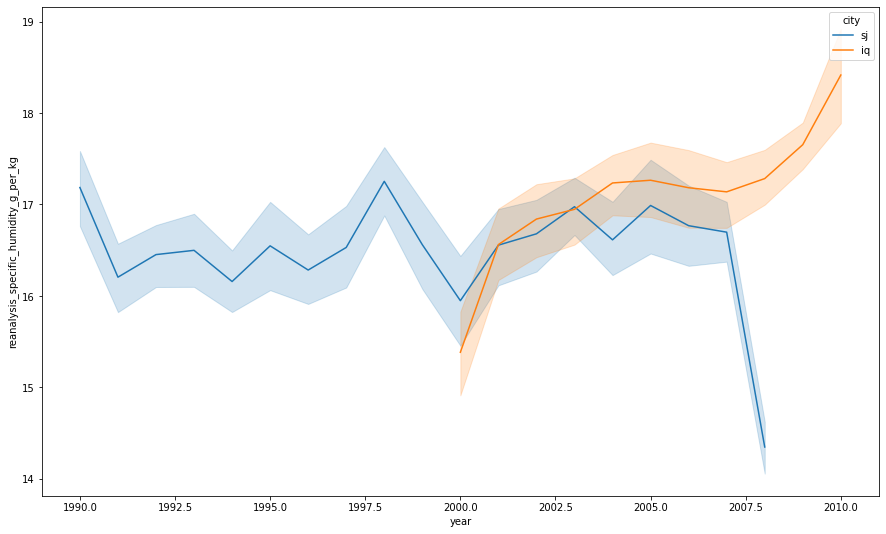

In [57]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=merged_df, x='year', y='reanalysis_specific_humidity_g_per_kg', hue='city')
plt.show()

In [58]:
merged_df[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']]

ndvi_se   ndvi_sw   ndvi_ne   ndvi_nw
0     0.198483  0.177617  0.122600  0.103725
1     0.162357  0.155486  0.169900  0.142175
2     0.157200  0.170843  0.032250  0.172967
3     0.227557  0.235886  0.128633  0.245067
4     0.251200  0.247340  0.196200  0.262200
...        ...       ...       ...       ...
1451  0.256343  0.292514  0.342750  0.318900
1452  0.136043  0.225657  0.160157  0.160371
1453  0.250357  0.233714  0.247057  0.146057
1454  0.278886  0.325486  0.333914  0.245771
1455  0.274214  0.315757  0.298186  0.232971

[1456 rows x 4 columns]

In [59]:
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
0             297.742857                   292.414286  ...   
1             298.442857                   293.951429  ...   
2             298.878571                   295.434286  ...   
3             299.228571                   295.310000  ...   
4             299.664286                   295.821429  ...   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [60]:
merged_df.shape

(1456, 25)

In [61]:
merged_df.loc[merged_df['ndvi_ne']<=0.1, :]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
7      sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
39     sj  1991           5      1991-01-29  0.091700  0.246425  0.243857   
41     sj  1991           7      1991-02-12  0.071200  0.221100  0.276243   
50     sj  1991          16      1991-04-16  0.077400  0.102400  0.163550   
...   ...   ...         ...             ...       ...       ...       ...   
956    iq  2000          46      2000-11-18  0.099933  0.035860  0.195486   
1244   iq  2006          22      2006-06-04  0.098371  0.101067  0.186314   
1295   iq  2007          22      2007-05-28  0.090057  0.082229  0.111057   
1343   iq  2008          18      2008-04-29  0.061729  0.133900  0.094714   
1391   iq  2009          14      2009-04-02  0.089057  0.058950  0.089271   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
2     0.170843                 34.54             298.781429   
7     0.133029                151.12             299.591429   
39    0.195600                  0.00             298.044286   
41    0.267343                 18.05             296.884286   
50    0.206167                 44.57             297.284286   
...        ...                   ...                    ...   
956   0.064183                 39.25             301.637143   
1244  0.097750                 79.48             295.987143   
1295  0.064743                 76.68             296.178571   
1343  0.117843                 42.12             298.072857   
1391  0.099343                131.17             297.245714   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
2                298.878571                   295.434286  ...   
7                299.528571                   296.531429  ...   
39               298.228571                   292.572857  ...   
41               297.114286                   292.972857  ...   
50               297.392857                   292.170000  ...   
...                     ...                          ...  ...   
956              302.614286                   294.232857  ...   
1244             297.171429                   294.557143  ...   
1295             297.185714                   294.038571  ...   
1343             299.414286                   296.741429  ...   
1391             298.385714                   296.545714  ...   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
2                         297.3                            26.10   
7                         298.4                            30.00   
39                        295.0                             5.70   
41                        294.1                            21.40   
50                        296.0                            21.90   
...                         ...                              ...   
956                       294.2                             3.60   
1244                      291.3                            44.65   
1295                      286.9                            29.10   
1343                      293.1                           115.99   
1391                      294.1                            63.30   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
2                                82.052857                         34.54   
7                                83.375714                        151.12   
39                               71.784286                          0.00   
41                               78.895714                         18.05   
50                               73.351429                         44.57   
...                                    ...                           ...   
956                              67.185714                         39.25   
1244                             92.505714                         79.48   
1295                             89.28000

In [62]:
merged_df.loc[(merged_df['ndvi_ne']>=0.2)&(merged_df['ndvi_ne']<=0.5), :]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
11     sj  1990          29      1990-07-16  0.291600  0.211800  0.301200   
17     sj  1990          35      1990-08-27  0.252900  0.330750  0.264171   
18     sj  1990          36      1990-09-03  0.235400  0.200025  0.283817   
22     sj  1990          40      1990-10-01  0.228550  0.189750  0.212486   
26     sj  1990          44      1990-10-29  0.252250  0.183433  0.318000   
...   ...   ...         ...             ...       ...       ...       ...   
1450   iq  2010          20      2010-05-21  0.263071  0.272500  0.258271   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
11    0.280667                 59.17             299.667143   
17    0.284314                 40.94             300.118571   
18    0.230443                 28.86             300.530000   
22    0.201186                 31.18             300.775714   
26    0.295900                101.35             299.727143   
...        ...                   ...                    ...   
1450  0.244500                  1.15             297.648571   
1451  0.292514                 55.30             299.334286   
1453  0.233714                 58.94             296.598571   
1454  0.325486                 59.67             296.345714   
1455  0.315757                 63.22             298.097143   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
11               299.750000                   296.334286  ...   
17               300.221429                   297.017143  ...   
18               300.635714                   296.117143  ...   
22               300.850000                   296.664286  ...   
26               299.778571                   296.534286  ...   
...                     ...                          ...  ...   
1450             298.707143                   293.227143  ...   
1451             300.771429                   296.825714  ...   
1453             297.592857                   295.501429  ...   
1454             297.521429                   295.324286  ...   
1455             299.835714                   295.807143  ...   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
11                        297.3                            40.90   
17                        298.7                            39.80   
18                        298.0                            30.40   
22                        299.1                            36.10   
26                        298.5                            22.26   
...                         ...                              ...   
1450                      290.1                             8.80   
1451                      294.5                            45.00   
1453                      292.4                            50.60   
1454                      291.9                            62.33   
1455                      292.3                            36.90   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
11                               82.144286                         59.17   
17                               83.348571                         40.94   
18                               77.172857                         28.86   
22                               78.520000                         31.18   
26                               82.787143                        101.35   
...                                    ...                           ...   
1450                             78.998571                          1.15   
1451                             88.765714                         55.30   
1453                             94.28000

In [63]:
merged_df.loc[(merged_df['ndvi_ne']>=0.6)&(merged_df['ndvi_ne']<=0.9), :]

Empty DataFrame
Columns: [city, year, weekofyear, week_start_date, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm, total_cases]
Index: []

[0 rows x 25 columns]

In [64]:
merged_df.loc[merged_df['ndvi_ne']>=0.5, :]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
1370   iq  2008          45      2008-11-04  0.501029  0.445000  0.427686   
1413   iq  2009          36      2009-09-03  0.508357  0.454429  0.538314   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
1370  0.545729                 57.85             298.464286   
1413  0.514829                 83.02             297.388571   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
1370             299.528571                   297.468571  ...   
1413             298.450000                   296.388571  ...   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1370                      293.1                           107.48   
1413                      293.5                            78.37   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1370                             95.290000                         57.85   
1413                             94.992857                         83.02   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1370                              19.252857           7.085714   
1413                              17.988571           7.642857   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1370               27.82                     12.1                35.6   
1413               27.60                     13.2                34.2   

      station_min_temp_c  station_precip_mm  total_cases  
1370                21.2              109.0           35  
1413                21.0               47.5            2  

[2 rows x 25 columns]

In [65]:
merged_df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].describe()

ndvi_ne      ndvi_nw      ndvi_se      ndvi_sw
count  1262.000000  1404.000000  1434.000000  1434.000000
mean      0.142294     0.130553     0.203783     0.202305
std       0.140531     0.119999     0.073860     0.083903
min      -0.406250    -0.456100    -0.015533    -0.063457
25%       0.044950     0.049217     0.155087     0.144209
50%       0.128817     0.121429     0.196050     0.189450
75%       0.248483     0.216600     0.248846     0.246982
max       0.508357     0.454429     0.538314     0.546017

In [66]:
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
0             297.742857                   292.414286  ...   
1             298.442857                   293.951429  ...   
2             298.878571                   295.434286  ...   
3             299.228571                   295.310000  ...   
4             299.664286                   295.821429  ...   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [67]:
weekly_cases = merged_df.groupby('weekofyear')['total_cases'].sum()

In [68]:
px.bar(weekly_cases, x=weekly_cases.index, y=weekly_cases.values)

In [69]:
high_cases_df = merged_df.loc[(merged_df['year']>=1990)&(merged_df['year']<=2000), :]

In [70]:
high_cases_df

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0     sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1     sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2     sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3     sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4     sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
..   ...   ...         ...             ...       ...       ...       ...   
957   iq  2000          47      2000-11-25  0.169983  0.289300  0.300983   
958   iq  2000          48      2000-12-02  0.251971  0.253800  0.323514   
959   iq  2000          49      2000-12-09  0.165833  0.182414  0.254567   
960   iq  2000          50      2000-12-16  0.338786  0.316829  0.350343   
961   iq  2000          51      2000-12-23  0.265014  0.169057  0.234867   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0    0.177617                 12.42             297.572857   
1    0.155486                 22.82             298.211429   
2    0.170843                 34.54             298.781429   
3    0.235886                 15.36             298.987143   
4    0.247340                  7.52             299.518571   
..        ...                   ...                    ...   
957  0.170917                 55.91             300.872857   
958  0.319100                 20.65             299.230000   
959  0.186250                 24.53             300.242857   
960  0.297700                111.06             298.757143   
961  0.302243                  3.90             300.411429   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
0               297.742857                   292.414286  ...   
1               298.442857                   293.951429  ...   
2               298.878571                   295.434286  ...   
3               299.228571                   295.310000  ...   
4               299.664286                   295.821429  ...   
..                     ...                          ...  ...   
957             301.914286                   293.060000  ...   
958             301.264286                   294.717143  ...   
959             301.028571                   293.305714  ...   
960             300.342857                   294.520000  ...   
961             302.000000                   291.092857  ...   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                        295.9                            32.00   
1                        296.4                            17.94   
2                        297.3                            26.10   
3                        297.0                            13.90   
4                        297.5                            12.20   
..                         ...                              ...   
957                      293.6                            11.20   
958                      293.5                            14.50   
959                      292.0                             1.70   
960                      291.9                            48.76   
961                      294.6                             5.70   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                               73.365714                         12.42   
1                               77.368571                         22.82   
2                               82.052857                         34.54   
3                               80.337143                         15.36   
4                               80.460000                          7.52   
..                                    ...                           ...   
957                             66.042857                         55.91   
958                             78.885714                         20.65   
959                             68.557143                         24.53   
960                   

In [71]:
px.bar(high_cases_df, x='year', y='total_cases')

In [72]:
px.bar(high_cases_df, x='weekofyear', y='total_cases')

In [73]:
px.bar(high_cases_df, x='weekofyear', y='precipitation_amt_mm')

In [74]:
pd.set_option('display.max_columns', 25)
merged_df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

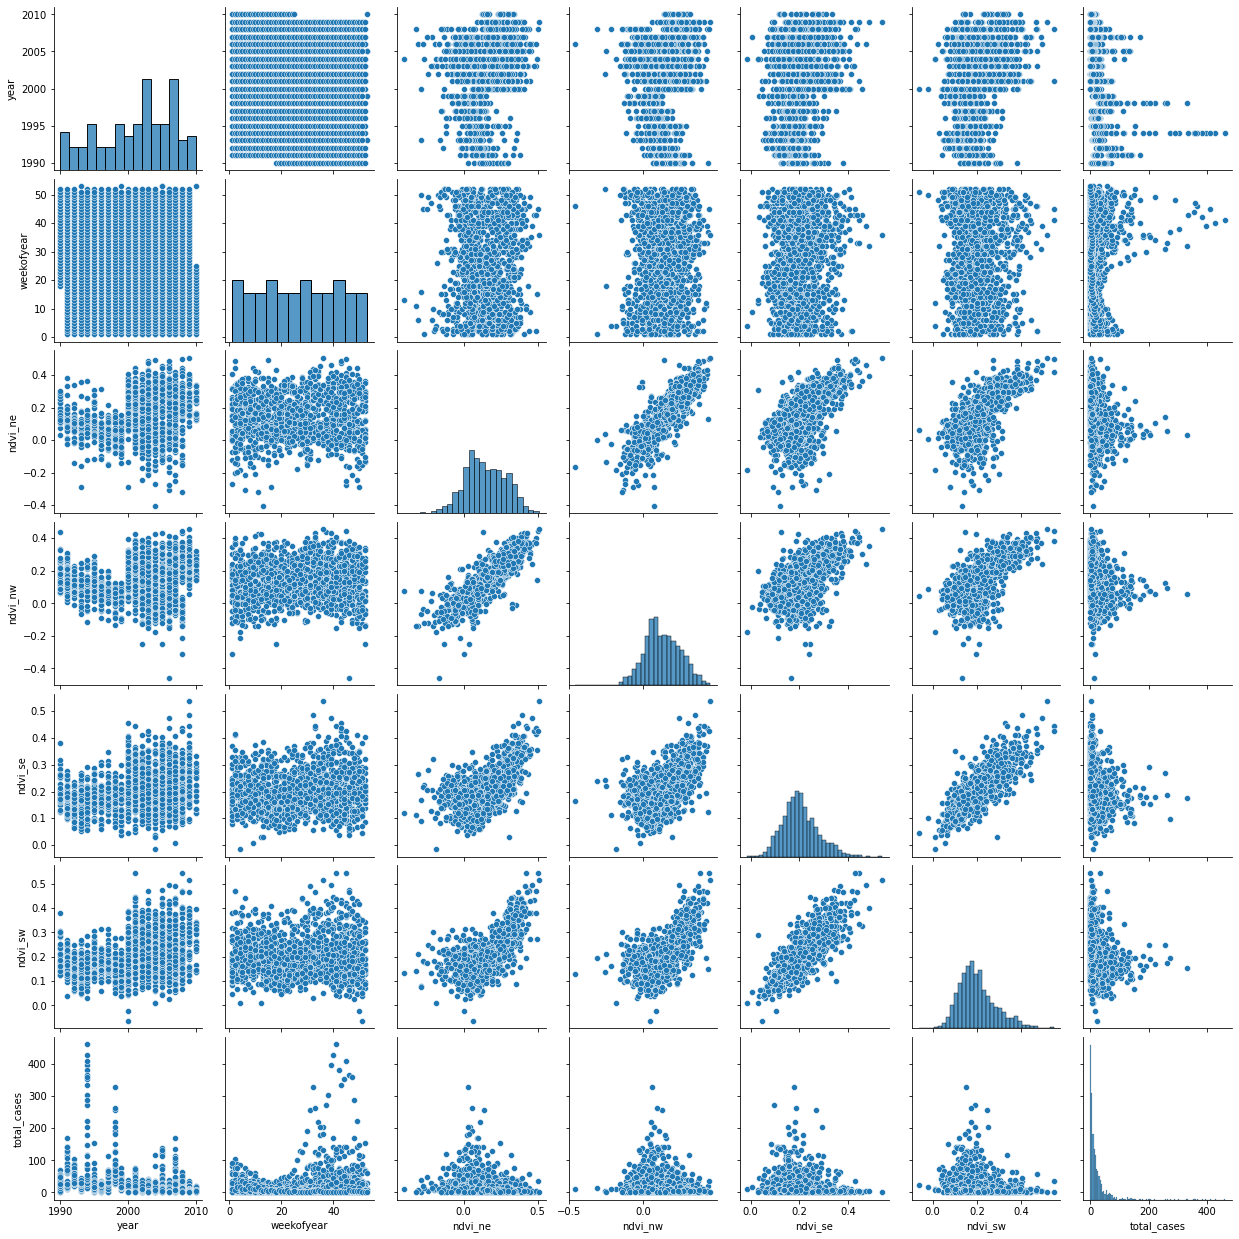

In [75]:
sns.pairplot(merged_df[['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'total_cases']])

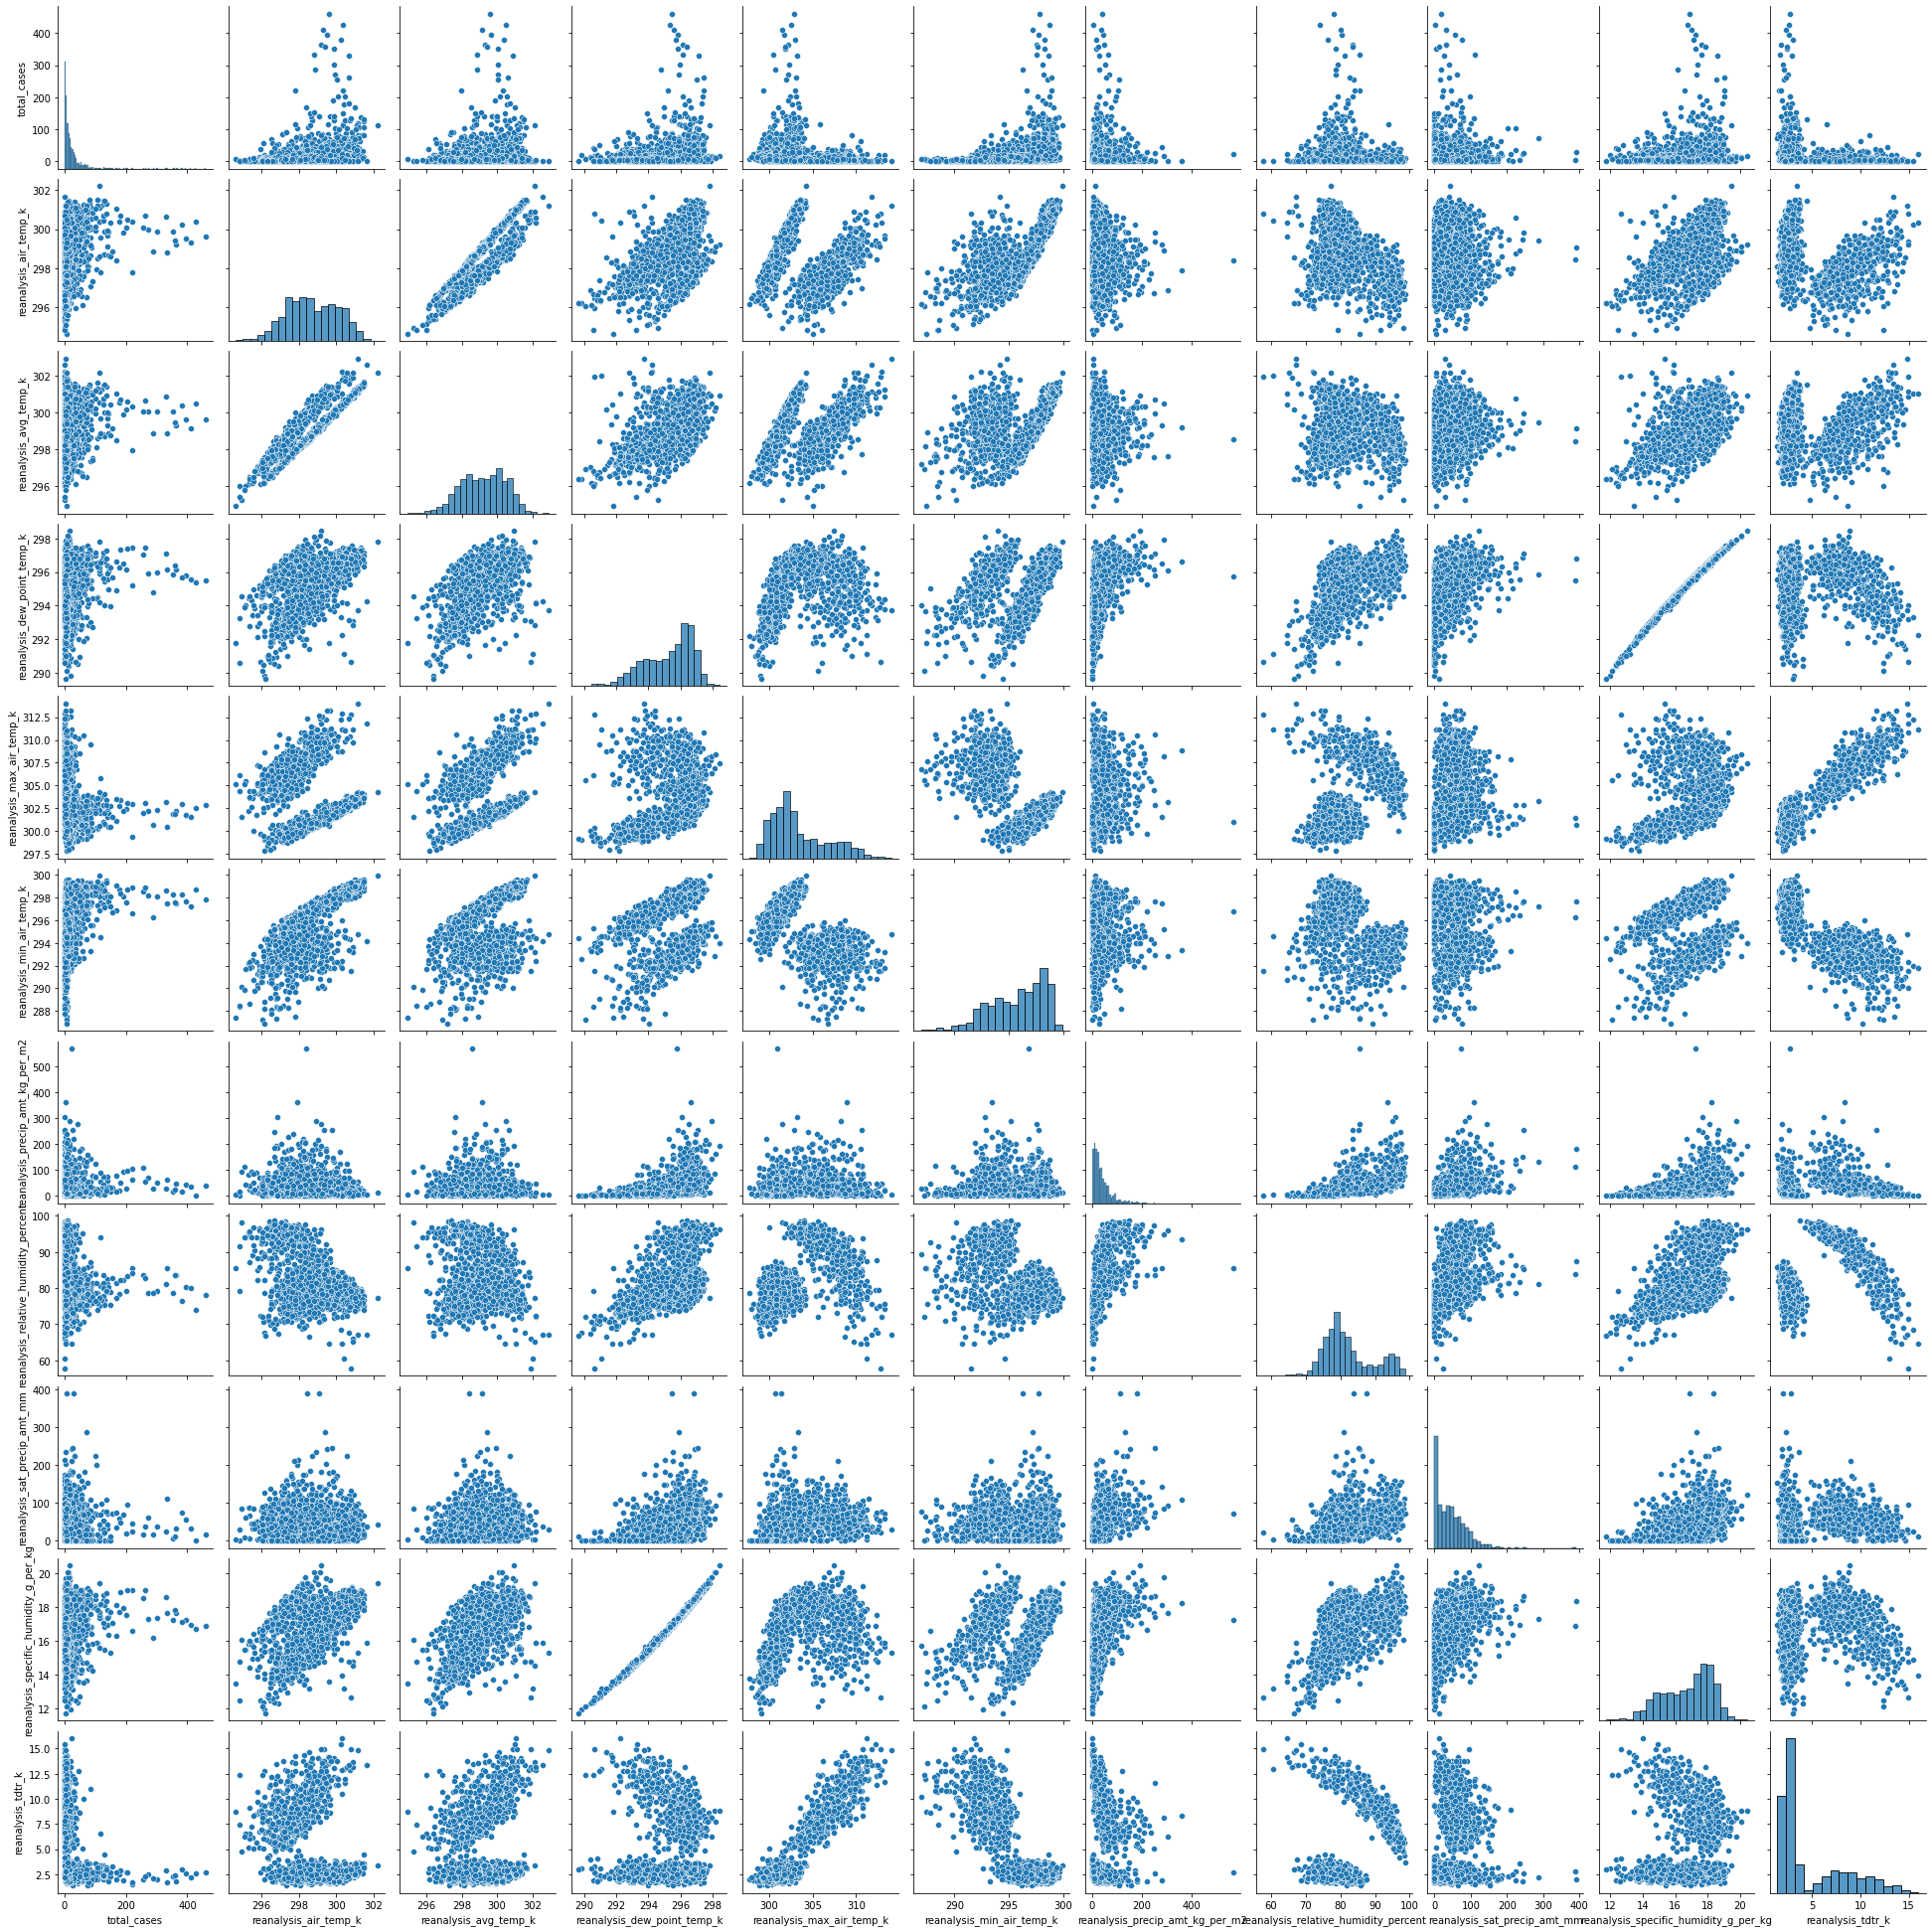

In [76]:
sns.pairplot(merged_df[['total_cases', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']])

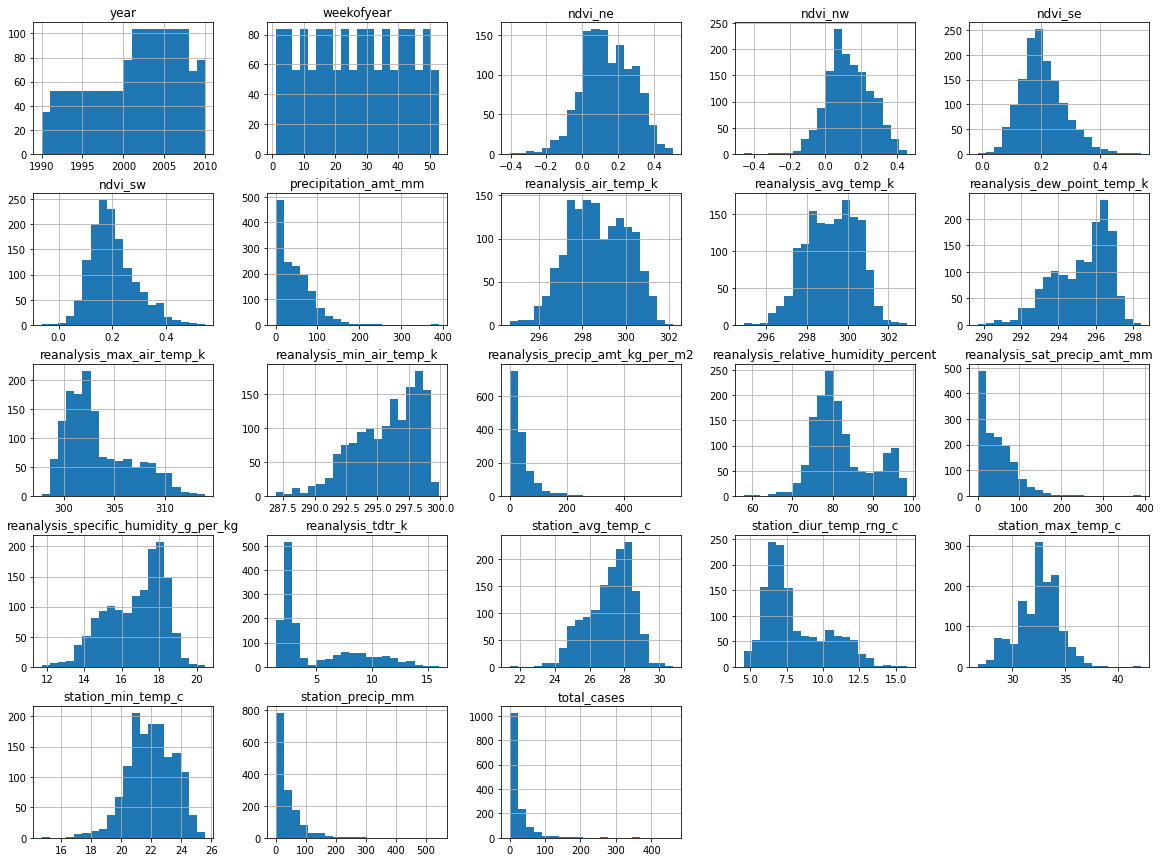

In [77]:
merged_df.hist(bins=20, figsize=(20, 15))
plt.show()

In [78]:
merged_df['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [79]:
merged_df['binned_cases'] = merged_df['total_cases'].apply(lambda x: 'LB' if (x>=0)&(x<=50) else 'MB' if (x>=50)&(x<=100) else 'UB')

In [80]:
merged_df['binned_cases'].value_counts()

LB    1286
MB     113
UB      57
Name: binned_cases, dtype: int64

In [81]:
merged_df['binned_cases'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1456 entries, 0 to 1455
Series name: binned_cases
Non-Null Count  Dtype 
--------------  ----- 
1456 non-null   object
dtypes: object(1)
memory usage: 55.0+ KB


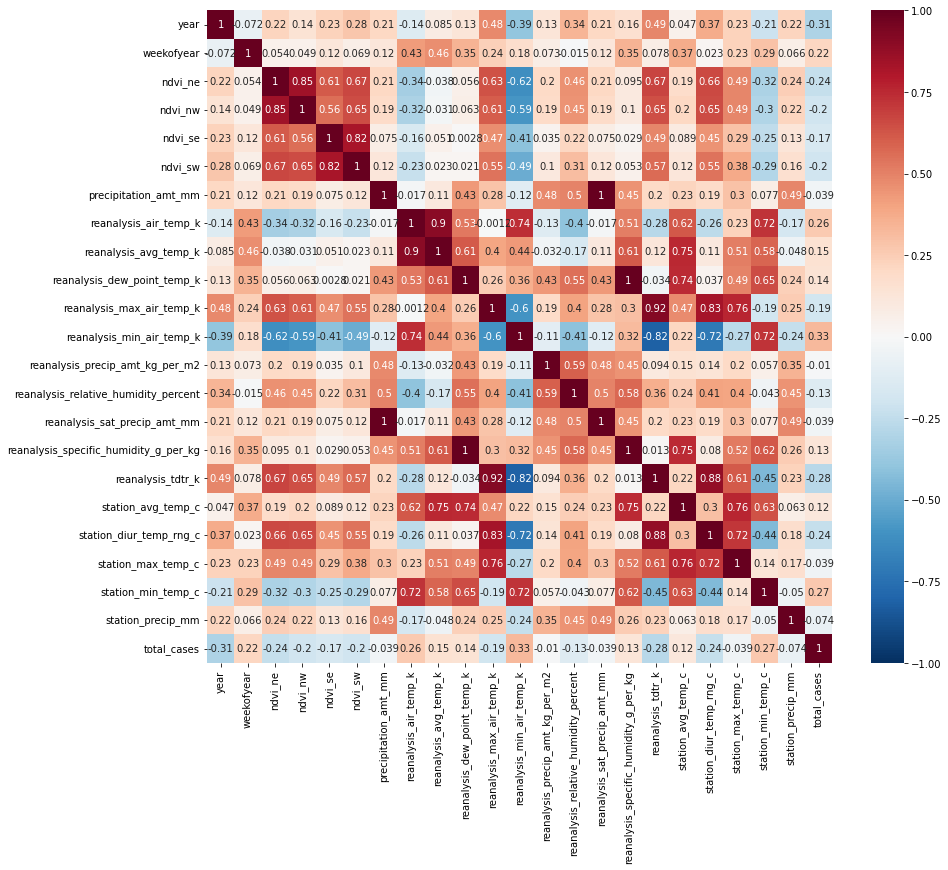

In [82]:
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(merged_df.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [84]:
mel_df = merged_df.drop(['city', 'week_start_date'], axis=1)

In [85]:
melt_grid_df = pd.melt(mel_df, id_vars=['binned_cases'], value_vars=mel_df.columns, var_name='variable', value_name='value')

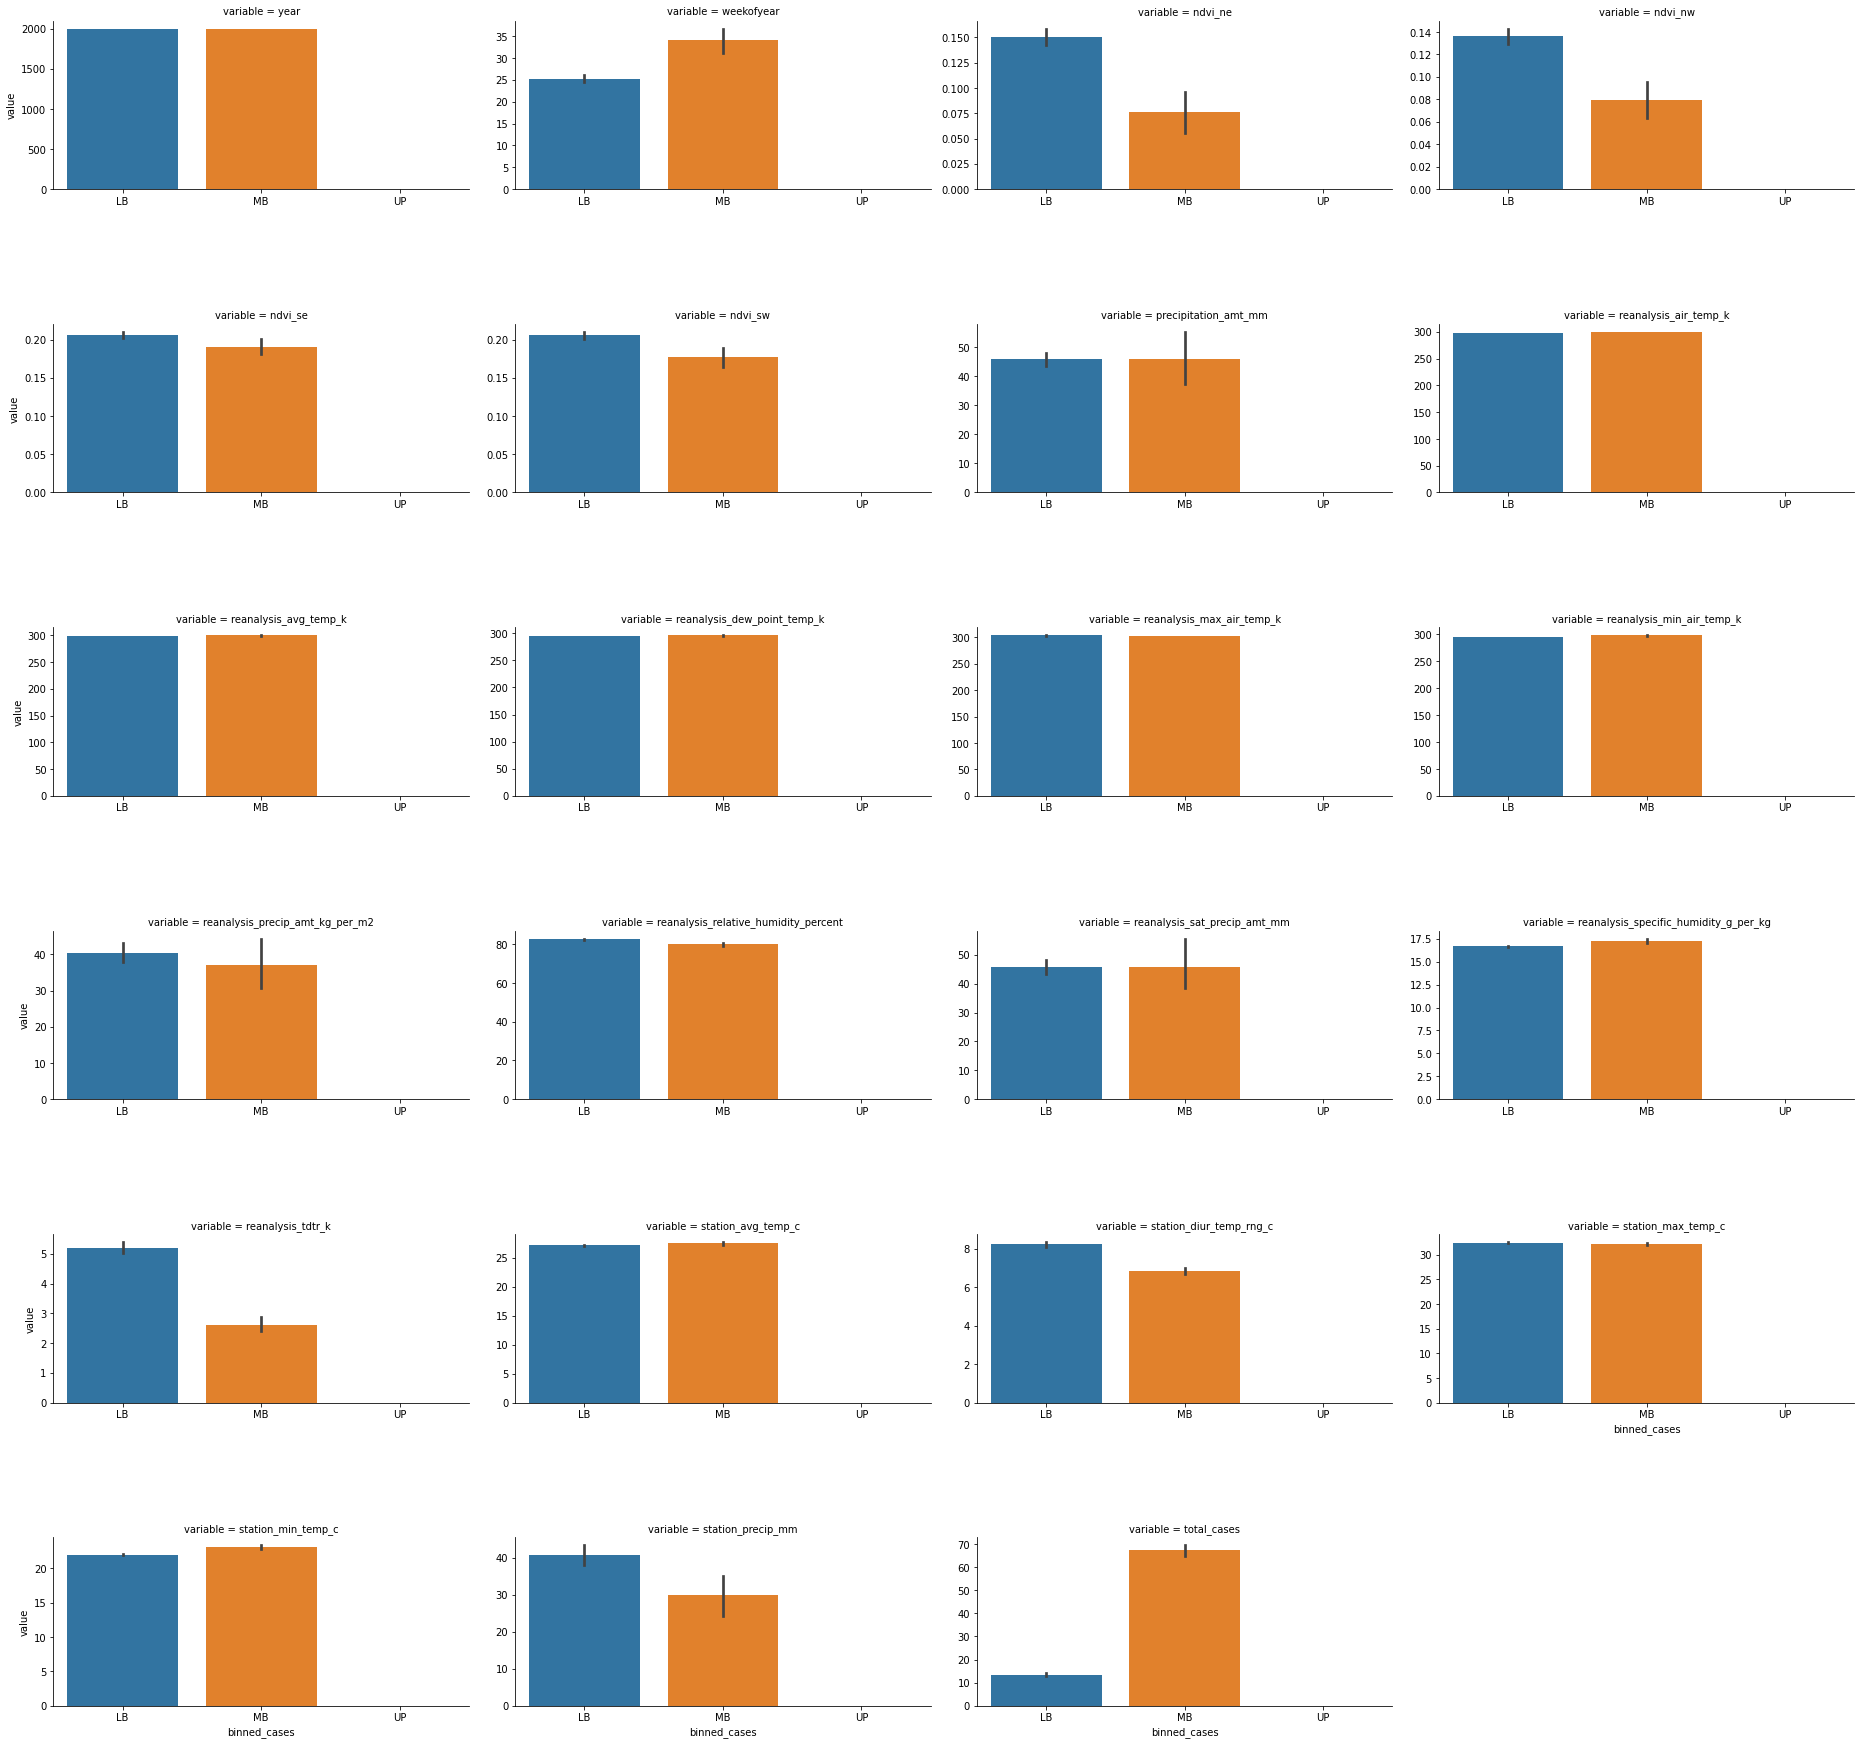

In [86]:
g = sns.FacetGrid(melt_grid_df, col='variable', col_wrap=4, sharey=False, sharex=False, hue='binned_cases', hue_order=['LB', 'MB', 'UP'], height=5, aspect=1.3)
g.map_dataframe(sns.barplot, x='binned_cases', y='value', order=['LB', 'MB', 'UP'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
plt.show()

In [87]:
melt_grid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33488 entries, 0 to 33487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   binned_cases  33488 non-null  object 
 1   variable      33488 non-null  object 
 2   value         32940 non-null  float64
dtypes: float64(1), object(2)
memory usage: 785.0+ KB


In [88]:
px.bar(merged_df, y='precipitation_amt_mm', x='weekofyear', color='binned_cases')

In [89]:
px.scatter(merged_df, x='precipitation_amt_mm', y='total_cases', trendline='ols')

In [90]:
px.bar(merged_df, x='weekofyear', y='precipitation_amt_mm', color='binned_cases')